In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")


In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(columns=["Serial No."] , inplace= True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.duplicated().sum()

0

In [8]:
X = df.iloc[: , :-1]
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [12]:
y = df.iloc[: , -1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 43)

In [33]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
12,328,112,4,4.0,4.5,9.10,1
199,313,107,3,4.0,4.5,8.69,0
488,322,112,3,3.0,4.0,8.62,1
231,319,106,3,3.5,2.5,8.33,1
3,322,110,3,3.5,2.5,8.67,1
...,...,...,...,...,...,...,...
277,320,101,2,2.5,3.0,8.62,0
305,321,109,3,3.5,3.5,8.80,1
255,307,110,4,4.0,4.5,8.37,0
320,317,106,3,4.0,3.5,8.50,1


In [34]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()


In [35]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [36]:
X_train_scaled

array([[0.76      , 0.71428571, 0.75      , ..., 0.875     , 0.73954984,
        1.        ],
       [0.46      , 0.53571429, 0.5       , ..., 0.875     , 0.60771704,
        0.        ],
       [0.64      , 0.71428571, 0.5       , ..., 0.75      , 0.585209  ,
        1.        ],
       ...,
       [0.34      , 0.64285714, 0.75      , ..., 0.875     , 0.50482315,
        0.        ],
       [0.54      , 0.5       , 0.5       , ..., 0.625     , 0.54662379,
        1.        ],
       [0.5       , 0.42857143, 0.5       , ..., 0.375     , 0.49196141,
        0.        ]])

In [37]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model = Sequential()

model.add(Dense(7 , activation= "relu" , input_dim = 7))

model.add(Dense(1 , activation = "linear"))

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss = "mean_squared_error" , optimizer="Adam" , metrics = ["accuracy"])

In [54]:
history = model.fit(X_train_scaled , y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.4292 - accuracy: 0.0000e+00 - val_loss: 0.3706 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3560 - accuracy: 0.0000e+00 - val_loss: 0.3026 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2885 - accuracy: 0.0000e+00 - val_loss: 0.2403 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2264 - accuracy: 0.0000e+00 - val_loss: 0.1877 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1747 - accuracy: 0.0000e+00 - val_loss: 0.1479 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1377 - accuracy: 0.0000e+00 - val_loss: 0.1218 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1153 - accuracy: 0.0000e+00 - 

In [55]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [56]:
from sklearn.metrics import r2_score

r2_score(y_test , y_pred)

0.7983072291207914

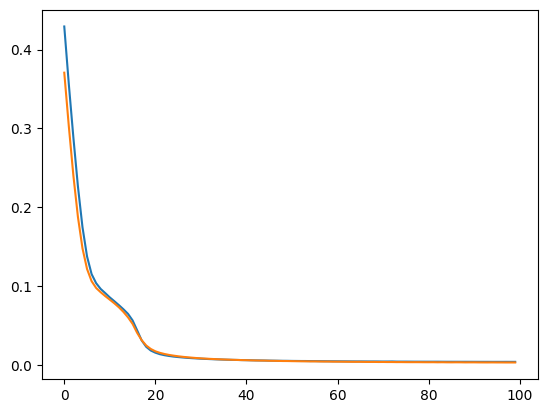

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])